## Week 7 Assignment - W18 MIDS Python

Assignment due date: 11:59PM PST the night before the Week 8 Live Session.

## Part 1 - Project Proposal
Please complete your project proposal, as discussed in class and outlined in the project_1 folder.  You may submit your 1-2 page proposal in a Google Doc or PDF.  Please store your proposal (or a link to it) in your repo under the project_1 folder.
This is worth 10 points of your **project** grade (not the grade for this homework).

## Part 2 - A Quick Reading

Please read the following article and write a couple sentences of reaction. What is the most interesting part?

<a href="http://programmingisterrible.com/post/139222674273/write-code-that-is-easy-to-delete-not-easy-to">Write code that is easy to delete, not easy to extend</a> This article is to explain an "architectural" perspective towards thinking about writing in large code bases. This might not really apply to the work that you are doing now but should provide some food for thought on upcoming projects. Think about the author's perspective and why he seems to have come to it. Please don't worry about knowing all the terminology or programs/systems that he refers to. I want you to extract what he's trying to say about writing code rather than the intricacies of the low-level systems that is referring to.


**[Write Response Here]**

I think this is a very intersting article on using common sense while writing the better manageable , maintainable code. It highlights the fine line on when to reuse vs when to write your own , when to modularize vs when to write big monoliths etc. People spend more time and effort on reengineering code than writing new most of the times , if the code is concise and clear , it makes the job easier for investigation when things go wrong. The best advice or takeaway is "Becoming a professional software developer is accumulating a back-catalogue of regrets and mistakes. You learn nothing from success. It is not that you know what good code looks like, but the scars of bad code are fresh in your mind."


#                               Please do 2 out of the 3 parts below.  
#                        That is, please do two parts of Parts 3, 4 & 5.

## Part 3 - Building Two Classes

Please design two classes in this notebook as follows:

1\. Please create a class called **playing_card**. This class should have: <br>
- An attribute, "rank" that takes a value of 2-10, J, Q, K, or A. <br>
- An attribute, "suit" that takes a value of "♠" "♥" "♦" or "♣". <br>
- An __init__ function 

2\. Please create a class called **deck**.  This class should have: <br>
- An attribute, "cards", that holds a list of playing_card objects. <br>
- An __init__ function that: <br>
    - By default stores a full deck of 52 playing cards (with proper numbers and suits) in the "cards" list. <br>
    - Allows the user to specify a specific suit.  In this case, the program should only populate the deck with the 13 cards of that suit.
    - After the cards object is initialized, call the "shuffle_deck()" function (below).<br>
    
- A "shuffle_deck()" function that randomly changes the order of cards in the deck.<br>
- A "deal_card(card_count)" function that removes the first X cards from the deck and returns them as a list.<br>
    - Make sure this function gives an appropriate response when the deck is out of cards.

3\. Please write a few lines of code in this notebook to demonstrate that the functions work as expected.

In [148]:
## Praba Santhanakrishnan ##

import random

class playing_card:

    """ Playing Card class , it has rank and suit attributes. rank accepts the values of 2-10, 'J','Q','K','A' and suit 
        accepts only "♠" ,"♥" ,"♦", "♣" """
    
    # Initialize the rank and suit attributes , defaults to 'A' , "♠" if values are not provided.
    
    def __init__(self, rank = 'A' , suit = "♠"):
        
        try:
            self.rank = rank
            self.suit = suit
        except ValueError as e:
            print(e)
            
    # rank property set , get methods
    @property
    def rank(self):
        return self.__rank
    
    @rank.setter
    def rank(self,rank):
        if rank in [2,3,4,5,6,7,8,9,10,'J','Q','K','A']:
            self.__rank = rank
        else:
            raise Exception('Rank value: ' + str(rank) + ' not permitted.') 
            
    # suit property set , get methods
    @property
    def suit(self):
        return self.__suit
    
    @suit.setter
    def suit(self,suit):
        if suit in ["♠" ,"♥" ,"♦", "♣"]:
            self.__suit = suit
        else:
            raise Exception('Suit value: ' + str(suit) + ' not permitted.') 
                 

                
                
class deck:
    
    """ deck class , it has cards object as attribute. By default it creates all the cards in the deck , if a suit is provided
        it creates only 13 cards object with the given suit """
    
    def __init__(self, suit=None):
        if suit is None:
            
            self.cards = [playing_card(rank,suit) for rank in [2,3,4,5,6,7,8,9,10,'J','Q','K','A'] for suit in ["♠" ,"♥" ,"♦", "♣"]]
        else:
            self.cards = [playing_card(rank,suit) for rank in [2,3,4,5,6,7,8,9,10,'J','Q','K','A']]
          
        
    @property
    def cards(self):
        return self.__cards
    
    @cards.setter
    def cards(self,cards):
        self.__cards = cards
        
    def shuffle_deck(self):
        random.shuffle(self.cards)
        
    def deal_cards(self,count):
        d_cards = []
        for i in range(count):
            if len(self.cards) > 0:
                x = self.cards.pop()
                d_cards.append((x.rank,x.suit))
            else:
                raise Exception("Deck is empty.")
        return d_cards
    
            
        
        
d1 = deck('♠')
d1.shuffle_deck()
for c in d1.cards:
    print((c.rank,c.suit),end = ' ')
print('\nDealing 4 cards now.......')
deal = d1.deal_cards(4)
print(deal)


(5, '♠') (2, '♠') (6, '♠') ('Q', '♠') ('K', '♠') (10, '♠') ('J', '♠') (3, '♠') ('A', '♠') (7, '♠') (9, '♠') (8, '♠') (4, '♠') 
Dealing 4 cards now.......
[(4, '♠'), (8, '♠'), (9, '♠'), (7, '♠')]


## Part 4 - Galton's Box

The following figure depicts Galton's box, a game in which marbles are dropped through N rows of pins.  In row 0, there is one position a marble can be in (labeled 0), in row 1, there are two positions (labeled 0 and 1), and so forth.  Each time the marble bounces from one row to the next, there is a 50% probability it bounces left and a 50% probability it bounces right.

<img src="Galton_Box.png">
<img src="Galton2.jpg">

Notice that if a marble is in position x of row y, and it bounces left, it ends up in position x of row y+1.  If it bounces right, it ends up in position x+1.

Create a class, **Marble**, to represent a single Marble that will drop through Galton's Box.  You should include attributes to represent the position of the marble.  Additionally, your \_\_init\_\_ method should accept a one-character label for use when printing the Marble.

Next, create a class, **GaltonBox**, to represent the overall setup.  You should include the following methods:

- \_\_init\_\_ - Your initializer should accept the size of the box, N.
- insert\_marble - This method should accept a Marble instance and sets its position to position 0, row 0.
- time\_step - This method should cause all Marbles in Galton's box to bounce to the next row, dropping left or right with equal probability.  When a marble reaches row N-1 at the bottom of the box, it should not move any more.  Note that you should simply allow marbles to occupy the same position (instead of working out a system to prevent a Marble from entering a position if another Marble is already there).
- \_\_str\_\_ and \_\_repr\_\_ - Include methods to display the Marbles currently in the box.  To keep things simple, if there are multiple Marbles in a given position, you only have to display one of the labels.

Your classes should mimic the following behavior (except that the horizontal positions are random):

```
>>> m1 = Marble("x")
>>> m2 = Marble("o")
>>> box = GaltonBox(3)
>>> box.insert_marble(m1)
>>> box
x
--
---
>>> box.time_step()
>>> box
-
-x
---
>>> box.insert_marble(m2)
>>> box
o
-x
---
>>> box.time_step()
>>> box
-
o-
-x-
>>> box.time_step()
>>> box
-
--
ox-
```



In [153]:
## Praba Santhanakrishnan ## 

import random

class Marble:
    """ Class for each Marble , which has a label """
    
    def __init__(self,label):
        self.label = label
        
    @property
    def label(self):
        return self.__label
    
    @label.setter
    def label(self,label):
        self.__label = label
    
    @property
    def position(self):
        return self.__position
    
    @position.setter
    def position(self,position):
        self.__position = position
    
    
    @property
    def row(self):
        return self.__row
    
    @row.setter
    def row(self,row):
        self.__row = row
        

class GaltonBox:
    
    """ Class for the GaltonBox , takes the size as input and allows marbles to be inserted. """
    
    def __init__(self,size):
        self.size = size
        self.marbles = []
        
        
        
    @property
    def size(self):
        return self.__size
    
    @size.setter
    def size(self,size):
        try:
            size = int(size)
        except:
            raise Exception('Plese enter valid Size. ')
        else:
            if size < 1:
                raise Exception('Please enter valid Size. ')
            else:
                self.__size = size   
                
                
    # Method to insert the marbles into the Box
    
    def insert_marble(self,marble):
        marble.position = 0
        marble.row = 0
        self.marbles.append(marble)
        
    # Advances each marble to the next row , position can be either left or right in the next row
    
    def time_step(self):
        for m in self.marbles:
            if m.row < self.size:
                m.row = m.row+1
                if random.randint(0,1) == 1:
                    m.position +=1
                    
    # Returns the structure of the positions of each marble in the box
    def __repr__(self):
        
        grid = {(m.row,m.position):m.label for m in self.marbles}
        output=''
        for i in range(0,self.size):
            for j in range(i+1):
                if (i,j) in grid:
                    output += str(grid[(i,j)])
                else:
                    output += '-'
            output += '\n'
        return output
        
    
m1 = Marble("x")
m2 = Marble("o")
m3 = Marble("w")

box = GaltonBox(5)

box.insert_marble(m1)

box.time_step()

box.insert_marble(m2)

box.time_step()

box.insert_marble(m3)

box.time_step()

box



            
    
    

-
w-
o--
x---
-----

**Bonus Investigation:** (Extra Credit: 2 points) Once your code is working, write a script to create a box with 20 rows, insert a few dozen Marbles, and repeatedly call time_step() until all Marbles are at the bottom.  Now adapt the following code to display a histogram of the final Marble positions.  What does the shape of the distribution look like?

In [147]:
box = GaltonBox(20)

(array([ 1.,  2.,  3.,  2.,  0.,  1.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 6 Patch objects>)

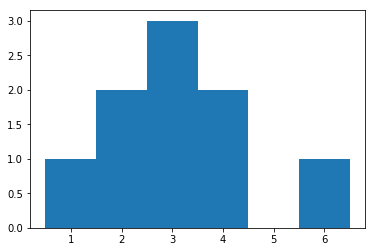

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_positions = (2,3,4,6,7,4,3,2,3,1)
cutoffs = np.arange(min(x_positions) - .5, max(x_positions)+.5)
plt.hist(x_positions, bins = cutoffs)

If you have taken a statistics course, you may recognize that the final position of each Marble follows a Binomial distribution.  Specifically, it is a Binomial distribution with parameters N and 0.5.  As you let N grow larger and larger, the Binomial distribution will approach the famous Normal distribution that you will see over and over in parametric statistics.  This is a consequence of an extremely important result known as the Central Limit Theorem.

## Part 5 - Sorting Marbles

In a particular board game, there are N spaces in a row, numbered 0 through N - 1 from left to right. There are also N marbles, numbered 0 through N - 1, initially placed in some arbitrary order. After that, there are two moves available:

- Switch: Switch the marbles in positions 0 and 1.
- Rotate: Move the marble in position 0 to position N - 1, and move all other marbles one space to the left (one index lower).
The objective is to arrange the marbles in order, with each marble i in position i.

a. Write a class, MarblesBoard, to represent the game above. The class should be initialized with a particular sequence of Marbles.  Write an \_\_init\_\_ function that takes a starting sequence of marbles (the number of each marble listed in the positions from 0 to N - 1).
Next, write switch() and rotate() methods to simulate the player's moves. Write a method, is_solved(), that returns True if the marbles are in the correct order.

Additionally, you may want to write \_\_str\_\_ and \_\_repr\_\_ methods that display the current state of the board. Your class should behave like the following example.
```
>>> board = MarblesBoard((3,6,7,4,1,0,8,2,5)) 
>>> board 
3 6 7 4 1 0 8 2 5 
>>> board.switch() 
>>> board 
6 3 7 4 1 0 8 2 5 
>>> board.rotate() 
>>> board 
3 7 4 1 0 8 2 5 6 
>>> board.switch() 
>>> board 
7 3 4 1 0 8 2 5 6
```

b. Write a second class, Solver, that actually plays the MarblesGame. You class should take a MarblesBoard in its initializer. Write a solve() method that repeatedly calls the switch() and rotate() methods of the given MarblesBoard until the game is solved.  You should print the state of the board after each move.  Additionally, print out the total number of moves at the end.

You are to come up with your own algorithm for solving the marbles game.  Before you write your solve() method, you may want to practice solving some small versions of the marbles game yourself.  Here is an example of using a Solver.

```
>>> board2 = MarblesBoard((1,3,0,2))
>>> solver = Solver(board2)
>>> solver.solve()
1 3 0 2 
3 0 2 1 
0 2 1 3 
2 1 3 0 
1 2 3 0 
2 3 0 1 
3 0 1 2 
0 1 2 3 
total steps: 7
```

Your Solver does not that to follow the fastest possible running time, but you should strive to make it reasonably efficient.  When you are done, compute the (tightest) big-O running time bound for your script.  

You may be interested to know that your program is a variation of a well-known sorting algorithm called bubble sort.  Bubble sort would normally be used on a list of items, not on a rotating track, but adapting your algorithm to this setting would be easy.

In [ ]:
## YOUR NAME HERE ## 

Below, explain what the big-O running time of your algorithm is.

**Your response here**